# COGS 108 - Final Project




## Overview

Food Inspectors are only realistically able to inspect each restaurant about twice a year, so an accurate potrayal of restaurants daily cleanliness is biased in these reports. A research experiment is conducted to analyze the correalation between restaurant food inspection scores and Yelp customer ratings to understand restaurant cleanliness on a daily basis. If the data resulst do not show a correalation, it advocates that food reviewer sites should become more knowledgeable food cleanliness critics.


## Name & GitHub¶

    Name: Name: Maged Ahmed Waly Jr.

    GitHub Username: AhmedWaly0000
    
    PID: A15441203



## Research Question

A problem with the restaurant health inspection process is that quarterly inspections are not an accurate depiction of daily restaurant cleanliness and it is dependent on the restaurant owner to maintain cleanliness when not inspected. The low economic funds for food inspectors decreases the number of inspections a restaurant receives each year and enhances the possibility restaurants are not staying up to cleanliness standards while they are not inspected. How can we implement public customer cleanliness inspection reviews to decrease workload of inspectors and increase cleanliness of restaurants?


## Background and Prior Work

I was able to understand problems food restaurant inspectors face through the article www.foodsafetymagazine.com .The article motivated my research to use the public to enhance food inspections.
Research has been conducted to find formulas that accurately depict restaurant cleanliness through food reviews. Dinginggrades.com and hdscores are both websites that have conducted their own food inspections by sifting through thousands of food reviews. The Dininggrades.com view on food inspection is that there should be universal food inspection standards and not determined by the state government. However, Hdscores implements their own formula to determine the inspection rating they give to their restaurants.
Yelp has been a strong advocate of more accurate food inspection reviews; they use hdscores restaurant inspection calculations in their website to display to consumers when they search for places to eat. There has been backlash from restaurants that the inspection scores are not accurate and will be hard to keep inspection scores up to date, if a restaurant has a low food inspection score on yelp it will possibly cause lower restaurant revenue.
Another way I want to implement the public in food inspection is by eliminating the gap of knowledge of food inspection laws to the customers. Creating an easy to understand food inspection guidelines that could be common knowledge to customers will enable them to make more accurate food inspection ratings from their eating experiences. Food inspectors can focus on restaurants that receive low cleanliness reviews from knowledgeable food reviewers.
The research I conduct will be coreallating data between yelp reviews and restaurant inspection scores. Data analysis will be done to find a more accurate portrayal of daily restaurant cleanliness using the professional knowledge of food inspectors and the daily novice food inspection of food reviewers.

References (include links):
1) https://www.foodsafetymagazine.com/enewsletter/challenges-of-health-department-food-safety-inspections/
2)https://www.washingtonpost.com/news/voraciously/wp/2018/07/24/yelp-adds-health-inspection-scores-for-restaurants-and-restaurateurs-are-not-happy/
3) https://www.dininggrades.com/cities/sandiego
4) https://hdscores.com/hd-scores/




## Hypothesis

I believe the data analysis results between food inspection scores and food reviewers will have some correlation to the cleanliness of the restaurant because an unclean restaurant would logically score lower than a cleaner restaurant. However, food reviewers potentially could focus more on the taste quality of the food and not the cleanliness of the restaurant in their ratings. Therefore there will be some correlation in the data analysis but the other variable taste quality will make the data less accurate. I believe food review sites like Yelp should implement a separate cleanliness rating score to pressure restaurants to maintain better cleaning standards. Furthermore, more knowledgeable customers of food safety guidelines would pressure restaurants to have cleaner operations on a daily basis. Knowledgeable customers will lessen the workload of food inspectors so they inspect restaurants with lower food cleanliness ratings more frequently.


## Dataset(s)


    
 Dataset Name: Inspections
 
    Link to the dataset: inspections.csv
    Number of observations:
    Description: A professional inspection report on restaurants that includes restaurants inspection score, number of critical and minor violations.

 Dataset Name: Yelp 
 
    Link to the dataset: yelp.csv
    Number of observations:
    Description: Yelp is a food review website where customers rate restaurant performance. 

I will use the restaurant inspection data combined with yelp restaurant customer ratings to analyze a more accurate potrayal of restaurant daily cleanliness.



## Setup¶


In [1]:
# Import libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.cm as cmap
from matplotlib.font_manager import FontProperties
import patsy
import statsmodels.api as sm

import folium
import sklearn
import csv
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from statsmodels.formula.api import ols
from math import sin, cos, sqrt, atan2, radians
from sklearn import preprocessing
from statsmodels.formula.api import ols


import matplotlib.pyplot as plt
from random import randint
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from folium.plugins import HeatMap
from scipy.stats import ttest_ind, chisquare, normaltest
from IPython.display import HTML

In [2]:
inspectionPath = r'inspections.csv'
yelpPath = r'yelp.csv'


In [3]:
#reading in csv paths
inspections = pd.read_csv(inspectionPath)



yelp = pd.read_csv(yelpPath)



## Data Cleaning

Following the safe Harbor method I dropped inspection columns that revealed private inspector information and I dropped columns that were unnecessary for my data analysis. Second, I checked rows that had null values then I dropped them. Third, I set address1 columns in each dataframe to lowercase to have a more accurate merge between dataframes yelp and inspections. Finally, I merged my two dataframes into a new dataframe that will be used to conduct data analysis.


In [4]:
#Dropping columns that were unnecessary or revealed private inspector information
inspections = inspections.drop(inspections.columns[[0,1,4,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,27,28,29,30,31,32,33,34,35]], axis=1) 
print(inspections)


yelp = yelp.drop(yelp.columns[[1,2,4,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]], axis=1) 

print(yelp)

#set address1 columns strings to lower to merge dataframes more accurately
yelp['address1'].str.lower()
inspections['address1'].str.lower()

inspections.head()

yelp.rename(columns={'zip_code': 'zip'}, inplace=True)




                                           name                      address1  \
0                         Cafe 3000 At Wake Med             3000 New Bern Ave   
1                           Overtime Sports Pub          1030-149 N Rogers Ln   
2                                TASTE OF CHINA           6209 ROCK QUARRY RD   
3                            Panera Bread #1643            1065 Darrington DR   
4      WalMart Supercenter #4499-00 Deli/Bakery              841 E Gannon AVE   
...                                         ...                           ...   
18461                                  Sino Wok   5959-1108 Triangle Town Blv   
18462         Weatherstone Elem. Sch. Cafeteria    1000 Olde Weatherstone Way   
18463  ALSTON RIDGE ELEMENTARY SCHOOL CAFETERIA  11555 GREEN LEVEL CHURCH  RD   
18464                Food Lion #996 Meat Market          7971 FAYETTEVILLE RD   
18465                         LA CAMPANA MARKET           1701 N ARENDELL AVE   

          city    zip  scor

In [5]:
yelp.head()

,id,rating,address1,zip,price
0,42nd-street-oyster-bar-rdu-airport-morrisville,2.5,2400 John Brantley Blvd,27560,$$
1,aldi-foods-cary,4.0,2303 NW Maynard Rd,27519,$
2,luciano-pizzeria-ristorante-northwest-raleigh,5.0,Crabtree Valley Mall,27612,$
3,olive-garden-italian-restaurant-wilson,3.0,3401 Raleigh Rd Pkwy W,27893,$$
4,subway-wilson-4,3.5,4934 Raleigh Rd,27896,$


In [6]:
#checking for null values

inspections.isnull().sum()



name                0
address1            0
city                0
zip                 0
score               0
num_critical        0
num_non_critical    0
dtype: int64

In [7]:
yelp.isnull().sum()

id            0
rating        0
address1     56
zip           0
price       780
dtype: int64

In [8]:
inspections = inspections.dropna()
inspections.isnull().sum()




name                0
address1            0
city                0
zip                 0
score               0
num_critical        0
num_non_critical    0
dtype: int64

In [9]:
yelp = yelp.dropna()
yelp.isnull().sum()

id          0
rating      0
address1    0
zip         0
price       0
dtype: int64

In [10]:
#merging inspections and yelp dataframes through address1 column
df = inspections.merge(yelp, how='inner', left_on=['address1'], right_on=['address1'])

#testing new dataframe
print(df)
print(df.iloc[10, :])
df.head()

                               name                 address1     city  zip_x  \
0               International Foods  2215 New Hope Church Rd  raleigh  27604   
1               International Foods  2215 New Hope Church Rd  raleigh  27604   
2               International Foods  2215 New Hope Church Rd  raleigh  27604   
3               International Foods  2215 New Hope Church Rd  raleigh  27604   
4               International Foods  2215 New Hope Church Rd  raleigh  27604   
...                             ...                      ...      ...    ...   
1606  McDonald`s At Cameron Village           416 Oberlin Rd  raleigh  27605   
1607  McDonald`s At Cameron Village           416 Oberlin Rd  raleigh  27605   
1608     Spring Hill Suites Kitchen        1128 Ledsome Lane     cary  27511   
1609     Spring Hill Suites Kitchen        1128 Ledsome Lane     cary  27511   
1610     Spring Hill Suites Kitchen        1128 Ledsome Lane     cary  27511   

      score  num_critical  num_non_crit

,name,address1,city,zip_x,score,num_critical,num_non_critical,id,rating,zip_y,price
0,International Foods,2215 New Hope Church Rd,raleigh,27604,97.5,0,6,international-foods-raleigh-3,3.5,27604,$
1,International Foods,2215 New Hope Church Rd,raleigh,27604,94.5,2,9,international-foods-raleigh-3,3.5,27604,$
2,International Foods,2215 New Hope Church Rd,raleigh,27604,96.0,4,5,international-foods-raleigh-3,3.5,27604,$
3,International Foods,2215 New Hope Church Rd,raleigh,27604,96.0,0,7,international-foods-raleigh-3,3.5,27604,$
4,International Foods,2215 New Hope Church Rd,raleigh,27604,94.5,1,9,international-foods-raleigh-3,3.5,27604,$


In [11]:
df.describe()

,zip_x,score,num_critical,num_non_critical,rating,zip_y
count,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000
mean,27592.476723,95.395717,3.371198,7.271881,3.387027,27592.133457
std,35.442157,2.507811,2.952841,4.834074,0.846967,35.705614
min,27502.000000,77.500000,0.000000,0.000000,1.000000,27502.000000
25%,27591.000000,94.000000,1.000000,4.000000,3.000000,27591.000000
50%,27612.000000,95.500000,3.000000,6.000000,3.500000,27612.000000
75%,27612.000000,97.000000,5.000000,10.000000,4.000000,27612.000000
max,27617.000000,100.000000,22.000000,28.000000,5.000000,27617.000000


## Data Analysis & Results



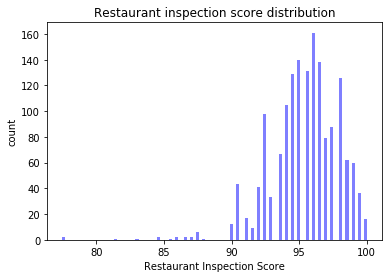

In [12]:
plt.hist(df['score'], bins=100, alpha=0.5, color='b');
plt.xlabel('Restaurant Inspection Score');
plt.ylabel('count');
plt.title('Restaurant inspection score distribution');




The restaurant inspection score has a normal distribution and a mean score around 95 out of 100.

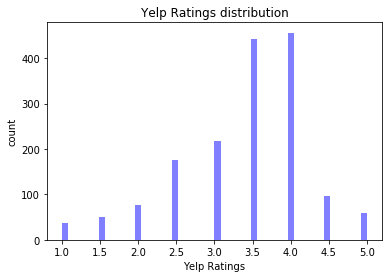

In [13]:
plt.hist(df['rating'], bins=50, alpha=0.5, color='b');
plt.xlabel('Yelp Ratings');
plt.ylabel('count');
plt.title('Yelp Ratings distribution');

The yelp ratings mean is between 3.5 and 4.0

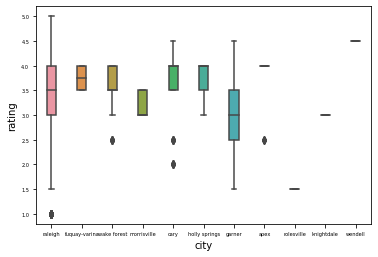

In [14]:
box1 = sns.boxplot(x="city", y = "rating", data=df, width = .3)
box1.tick_params(labelsize=5)

A boxplot between Noerth Carolina cities and yelp ratings was conducted to compare cities restaurant yelp ratings.

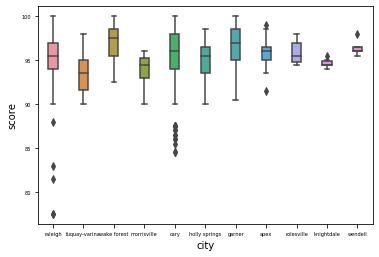

In [15]:
box2 = sns.boxplot(x="city", y = "score", data=df, width = .3)
box2.tick_params(labelsize=5)

A boxplot comparing cities restaurant inspection scores.

(-0.06103747358479948, 0.01427529335374218)


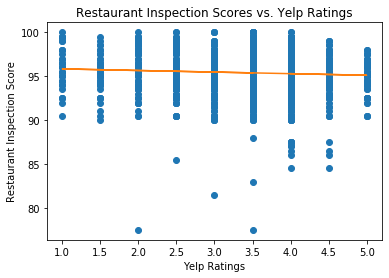

In [16]:
print(stats.pearsonr(df['score'], df['rating']))
plt.plot(df['rating'],df['score'],'o')
m, b = np.polyfit(df['rating'], df['score'], 1)
plt.plot(df['rating'], m*df['rating'] + b)
plt.xlabel('Yelp Ratings');
plt.ylabel('Restaurant Inspection Score');
plt.title('Restaurant Inspection Scores vs. Yelp Ratings');

Scatterplot with regression line is used to determine the correalation between Restaurant Inspection Scores and Yelp Ratings. The results show that there is not a strong correalation between the two variables.

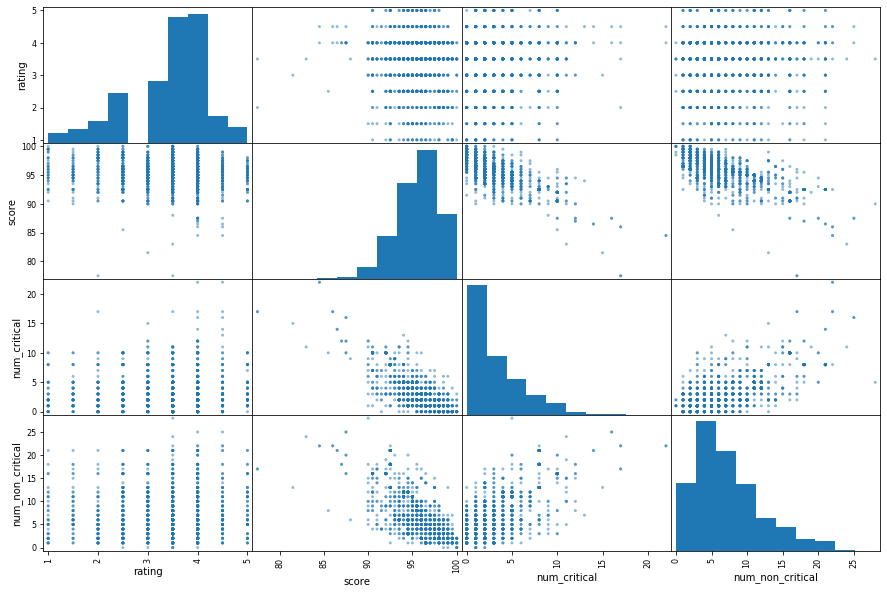

In [17]:
pd.plotting.scatter_matrix(df[['rating','score','num_critical','num_non_critical']], 
                           figsize=(15, 10));

Scatter matrix is conducted using variables Yelp rating, inspection score, inspection critical violations and inspection non critical violations.

## Ethics & Privacy

There will be issues that arise from collecting data to more accurately depict daily restaurant food cleanliness. A restaurant's food inspection review is very important to their business, it is important that when getting data and producing online food inspection scores that we give options for restaurants to retake inspections to achieve ‘A’ inspection ratings. 

Using the public as a source for food inspection reviews comes with human bias that must be taken into account. It must be clear in the ratings that reviews have human bias and that the scores are from the wisdom of the crowds effect, that the average reviews of a restaurant will create an accurate result of the restaurant’s cleanliness. Also, there must be food reviewer site moderators who check for discrepancies in restaurant cleanliness rating such as computer algorithms that boost restaurant scores.



## Conclusion & Discussion

The puropose of this project was to analyze the correaltion between yelp rating review from daily customers and professional food inspection scores on restaurants to get an accurate view of restaurants daily cleanliness standards. After viewing the relationship from the angles of barplots, boxplots, scatterplots with linear regression and scatter matrix the results mainly had an ambigeous and non corresponding relationship. My data was limited because the yelp ratings were not specifically tailored for restaurant cleanliness and yelp reviewers could possibly order food online and would not have knowledge of restaurant cleanliness compared to eating at the restaurant. I believe food review websites should input easily understandable food inspection guidelines to know so they can be better critics of restaurant cleanliness. Also, food review website should implement a seperate rating system for the cleanliness of the restaurant based on customer reviews. The food inspection agency due to its low budget has trouble enforcing food cleanliness onto restaurants; inspectors are able to inspect a restaurant usually twice a year. Thus, it is up to customers being more knowledable about food safety guidelines to enhance restaurant cleanliness. 


## Project Proposal late submission Note
When submitting my project proposal I accidently submitted my pull request incorrectly and received a zero on the the project proposal. I did not know that I made a mistake until week 10 and I noticed that instructors reached out to help fix the problem. This situation happened out of my own negligence, so I would like the project proposal sections in my final project to be used also as a late submission to my project proposal.